## **Ejercicio CoVid-19**

**Definicion de librerias**

In [1]:
import numpy as np
import matplotlib.pylab as plt
from math import exp,log,sqrt,pi,sin
import scipy.stats as sts
import pandas as pd
%matplotlib inline

**Importacion de datos y limpieza**

In [2]:
ruta = 'C:/Users/1063949520/Marcos/Tareas_Estadistica/'
nombre='200503COVID19MEXICO.csv'
df = pd.read_csv(ruta+nombre,encoding="iso-8859-1").reset_index(drop=True)

In [3]:
df.shape

(95839, 35)

In [4]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-03,134d54,1,4,17,2,17,17,6,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-05-03,05f125,1,4,9,1,9,9,15,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-05-03,0d2268,1,4,2,2,25,2,2,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-05-03,063132,1,4,9,2,9,9,15,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-05-03,0c0bda,1,12,14,1,14,14,39,2,...,2,2,2,2,2,2,99,MÃ©xico,99,2


In [5]:
##Valores duplicados por id_registro
df[df['ID_REGISTRO'].duplicated()]
##No hay duplicados!

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI


**Analisis descriptivo de los datos**

,TIPO_PACIENTE,EDAD,SEXO,RESULTADO,ENTIDAD_RES,ENTIDAD_UM
count,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000
mean,1.266812,42.052734,1.508353,1.887238,14.897620,14.660639
std,0.442296,17.318496,0.499933,0.603595,8.006973,8.075045
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,30.000000,1.000000,2.000000,9.000000,9.000000
50%,1.000000,41.000000,2.000000,2.000000,14.000000,14.000000
75%,2.000000,53.000000,2.000000,2.000000,20.000000,20.000000
max,2.000000,113.000000,2.000000,3.000000,32.000000,32.000000


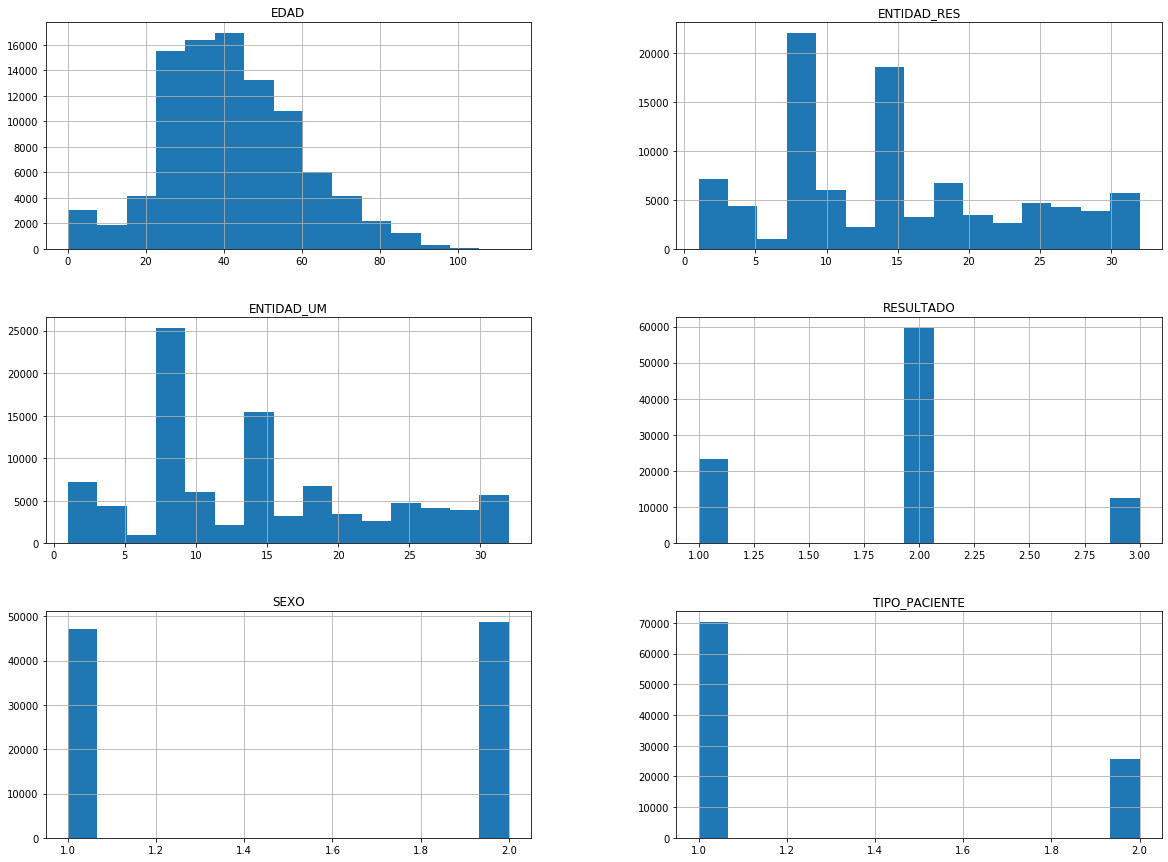

In [38]:
var = ['TIPO_PACIENTE','EDAD','SEXO','RESULTADO','ENTIDAD_RES','ENTIDAD_UM']
X=df[var].copy()
X.hist(bins=15, figsize=(20,15))
X.describe()
##Las distribuciones de la entidad donde residen es similar a la de entidad donde se atienden , 97% se atienden donde residen

**Filtro para Personas Diagnosticadas**

In [39]:
X=X.loc[X['RESULTADO']==1]

**Lista de DATOS para analizar**

In [40]:
X.reset_index(drop=True,inplace=True)

In [41]:
X.shape

(23471, 6)

In [42]:
X.head()

,TIPO_PACIENTE,EDAD,SEXO,RESULTADO,ENTIDAD_RES,ENTIDAD_UM
0,1,45,1,1,9,9
1,1,35,2,1,9,9
2,1,14,2,1,30,30
3,2,50,2,1,8,8
4,2,80,2,1,12,12


In [43]:
n=len(X['TIPO_PACIENTE'])

In [44]:
n

23471

In [45]:
X['Flag_Hosp_25_40']= ((X['TIPO_PACIENTE']==2) & (X['EDAD']>=25) & (X['EDAD']<=40))*1

In [46]:
X.shape

(23471, 7)

In [48]:
##Numero de individuos diagnosticados con SARS-CoV-2 con edad entre 25 y 40 años y hospitalizados
X['Flag_Hosp_25_40'].sum(axis=0)

1613

**Definicion de los estadisticos**

In [14]:
T= lambda x: np.median(x)

In [15]:
T2= lambda x: x.mean()

In [52]:
##Edad promedio de las personas diagnosticados con SARS-CoV-2##
Prom_real_edad=T2(X['EDAD'])
##Edad promedio de las personas diagnosticados con SARS-CoV-2 en la CDMX##
X1=X.loc[X['ENTIDAD_RES']==9]
PromCDMX_real_edad=T2(X1['EDAD'])
##Edad promedio de las personas hospitalizadas por ser diagnosticados con SARS-CoV-2##
X2=X.loc[X['TIPO_PACIENTE']==2]
PromHOSP_real_edad=T2(X2['EDAD'])
##Edad promedio de las mujeres hospitalizadas por ser diagnosticadas con SARS-CoV-2##
X3=X.loc[(X['TIPO_PACIENTE']==2) & (X['SEXO']==1)]
PromHOSP_real_edad_F=T2(X3['EDAD'])
##La edad mediana de las personas diagnosticadas con SARS-CoV-2##
Mediana_real_edad=T(X['EDAD'])
##El cuantil 0.7 de la edad de las personas diagnosticadas con SARS-CoV-2 en la CDMX##
alpha=0.7
q_real=np.quantile(a=X1['EDAD'],q=alpha)
##La probabilidad de que una persona diagnosticada con SARS-CoV-2 con edad entre 25 y 40 años sea hospitalizado
probabilidad_hosp_real=(X['Flag_Hosp_25_40'].sum(axis=0))/n

In [53]:
display(pd.DataFrame([Prom_real_edad,PromCDMX_real_edad,PromHOSP_real_edad,PromHOSP_real_edad_F,Mediana_real_edad,q_real,probabilidad_hosp_real],index=['Edad_Promedio_SARS','Edad_Promedio_SARS_CDMX','Edad_Promedio_SARS_HOSP',
                                                        'Edad_Promedio_SARS_MUJ_HOPS',
                                                        'Edad_Mediana_SARS',
                                                        '$q_{%s}$'%alpha,
                                                        'Probabilidad_de_Hospitalizacion']))

,0
Edad_Promedio_SARS,46.514081
Edad_Promedio_SARS_CDMX,46.426056
Edad_Promedio_SARS_HOSP,53.481985
Edad_Promedio_SARS_MUJ_HOPS,54.107794
Edad_Mediana_SARS,46.000000
$q_{0.7}$,54.000000
Probabilidad_de_Hospitalizacion,0.068723


(array([0.00638928, 0.01199938, 0.01854449, 0.03927069, 0.11438367,
        0.22019635, 0.35624123, 0.48994857, 0.61196821, 0.74396135,
        0.84712482, 0.90509584, 0.95137915, 0.97818295, 0.990494  ,
        0.99735079, 0.99906498, 0.99968833, 0.99984416, 1.        ]),
 array([  0.  ,   5.65,  11.3 ,  16.95,  22.6 ,  28.25,  33.9 ,  39.55,
         45.2 ,  50.85,  56.5 ,  62.15,  67.8 ,  73.45,  79.1 ,  84.75,
         90.4 ,  96.05, 101.7 , 107.35, 113.  ]),
 <a list of 20 Patch objects>)

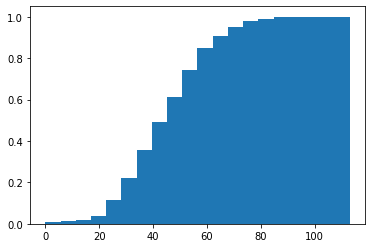

In [54]:
##Verificacion del cuantil 0.7 de la edad de las personas diagnosticadas con SARS-CoV-2 en la CDMX##
plt.hist(X1['EDAD'], bins=20, cumulative=True, density=True)

**Remuestreo**

In [60]:
##Edad promedio de las personas diagnosticados con SARS-CoV-2##
B=500
T1_List=[]
for i in range(B):
    Z=T2(np.random.choice(X['EDAD'],n)) 
    T1_List.append(Z)

In [32]:
##Edad promedio de las personas diagnosticados con SARS-CoV-2 en la CDMX##
B=500
T2_List=[]
for i in range(B):
    Z=T2(np.random.choice(X1['EDAD'],n)) 
    T2_List.append(Z)

In [33]:
##Edad promedio de las personas hospitalizadas por ser diagnosticados con SARS-CoV-2##
B=500
T3_List=[]
for i in range(B):
    Z=T2(np.random.choice(X2['EDAD'],n)) 
    T3_List.append(Z)

In [34]:
##Edad promedio de las mujeres hospitalizadas por ser diagnosticadas con SARS-CoV-2##
B=500
T4_List=[]
for i in range(B):
    Z=T2(np.random.choice(X3['EDAD'],n)) 
    T4_List.append(Z)

In [35]:
##La edad mediana de las personas diagnosticadas con SARS-CoV-2##
B=1000
T5_List=[]
for i in range(B):
    Z=T(np.random.choice(X['EDAD'],n)) 
    T5_List.append(Z)

In [36]:
##El cuantil 0.7 de la edad de las personas diagnosticadas con SARS-CoV-2 en la CDMX##
B=2000
T6_List=[]
for i in range(B):
    Z=np.quantile(a=np.random.choice(X1['EDAD'],n),q=alpha) 
    T6_List.append(Z)

In [55]:
##La probabilidad de que una persona diagnosticada con SARS-CoV-2 con edad entre 25 y 40 años sea hospitalizado##
B=500
T7_List=[]
for i in range(B):
    Z=(np.random.choice(X['Flag_Hosp_25_40'],n).sum(axis=0))/n
    T7_List.append(Z)

Text(0.5, 1.0, 'Proba_de_Hospitalizacion_Remuestreo')

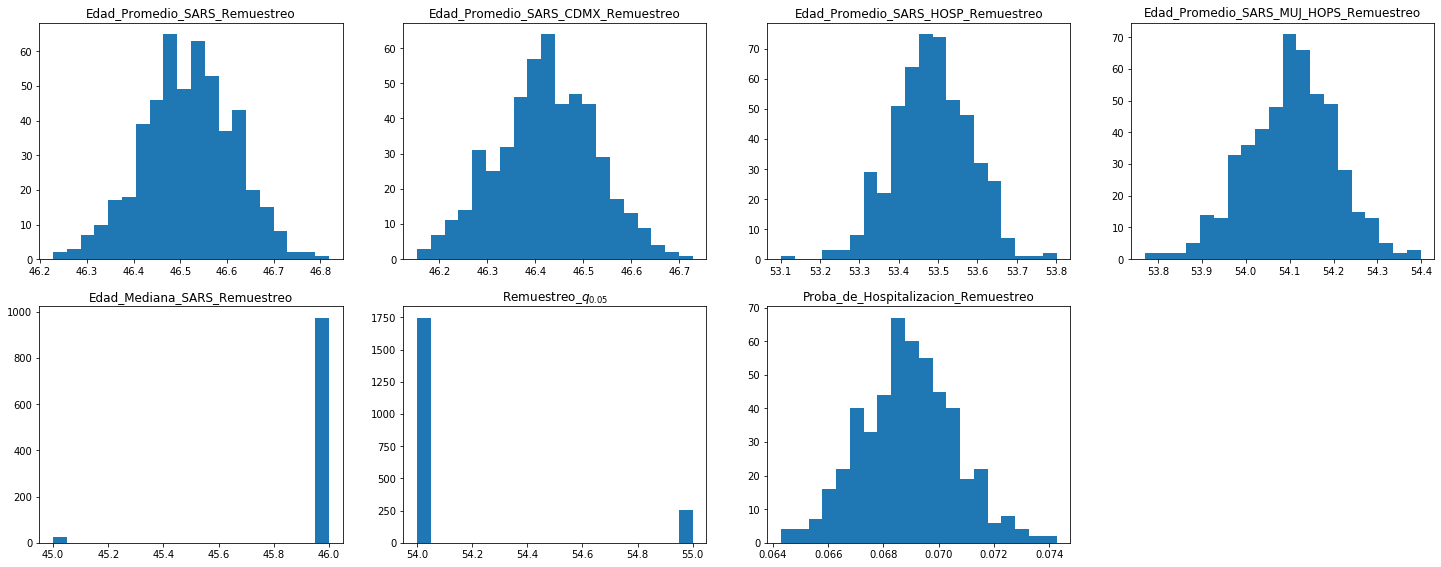

In [84]:
plt.figure(figsize=[25,20])
plt.subplot(4,4,1)
plt.hist(T1_List,bins=20)
plt.title('Edad_Promedio_SARS_Remuestreo')

plt.subplot(4,4,2)
plt.hist(T2_List,bins=20)
plt.title('Edad_Promedio_SARS_CDMX_Remuestreo')

plt.subplot(4,4,3)
plt.hist(T3_List,bins=20)
plt.title('Edad_Promedio_SARS_HOSP_Remuestreo')

plt.subplot(4,4,4)
plt.hist(T4_List,bins=20)
plt.title('Edad_Promedio_SARS_MUJ_HOSP_Remuestreo')

plt.subplot(4,4,5)
plt.hist(T5_List,bins=20)
plt.title('Edad_Mediana_SARS_Remuestreo')

plt.subplot(4,4,6)
plt.hist(T6_List,bins=20)
plt.title('Remuestreo_$q_{%s}$'%alpha)

plt.subplot(4,4,7)
plt.hist(T7_List,bins=20)
plt.title('Proba_de_Hospitalizacion_Remuestreo')

**Varianzas Mediante Bootstraping**

In [62]:
List_Estadisticos=[T1_List,T2_List,T3_List,T4_List,T5_List,T6_List,T7_List]
l=[]
for a in List_Estadisticos:
    z=np.var(a)
    l.append(z)

In [63]:
display(pd.DataFrame([l[0],l[1],l[2],l[3],l[4],l[5],l[6]],index=['Var_Edad_Promedio_SARS','Var_Edad_Promedio_SARS_CDMX','Var_Edad_Promedio_SARS_HOSP',
                                                        'Var_Edad_Promedio_SARS_MUJ_HOSP',
                                                        'Var_Edad_Mediana_SARS',
                                                        'Var_$q_{%s}$'%alpha,
                                                        'Var_Probabilidad_de_Hospitalizacion']))

,0
Var_Edad_Promedio_SARS,0.009315
Var_Edad_Promedio_SARS_CDMX,0.010299
Var_Edad_Promedio_SARS_HOSP,0.009231
Var_Edad_Promedio_SARS_MUJ_HOPS,0.010363
Var_Edad_Mediana_SARS,0.024375
Var_$q_{0.7}$,0.110124
Var_Probabilidad_de_Hospitalizacion,0.000003


**Varianzas Mediante Jackknife**

In [69]:
##Edad promedio de las personas diagnosticados con SARS-CoV-2##
T_1=[]
Data=list(X.EDAD)
for i in range (n):
    z=np.mean(Data[0:i]+Data[i+1:])
    T_1.append(z)

In [70]:
##Edad promedio de las personas diagnosticados con SARS-CoV-2 en la CDMX##
T_2=[]
Data=list(X1.EDAD)
for i in range (n):
    z=np.mean(Data[0:i]+Data[i+1:])
    T_2.append(z)

In [71]:
##Edad promedio de las personas hospitalizadas por ser diagnosticados con SARS-CoV-2##
T_3=[]
Data=list(X2.EDAD)
for i in range (n):
    z=np.mean(Data[0:i]+Data[i+1:])
    T_3.append(z)

In [72]:
##Edad promedio de las mujeres hospitalizadas por ser diagnosticadas con SARS-CoV-2##
T_4=[]
Data=list(X3.EDAD)
for i in range (n):
    z=np.mean(Data[0:i]+Data[i+1:])
    T_4.append(z)

In [73]:
##La edad mediana de las personas diagnosticadas con SARS-CoV-2##
T_5=[]
Data=list(X.EDAD)
for i in range (n):
    z=np.median(Data[0:i]+Data[i+1:])
    T_5.append(z)

In [74]:
##El cuantil 0.7 de la edad de las personas diagnosticadas con SARS-CoV-2 en la CDMX##
T_6=[]
alpha=0.7
Data=list(X1.EDAD)
for i in range (n):
    z=np.quantile(a=Data[0:i]+Data[i+1:],q=alpha)
    T_6.append(z)

In [75]:
##La probabilidad de que una persona diagnosticada con SARS-CoV-2 con edad entre 25 y 40 años sea hospitalizado##
T_7=[]
Data=list(X.Flag_Hosp_25_40)
for i in range (n):
    z=(sum(Data[0:i]+Data[i+1:]))/len(Data[0:i]+Data[i+1:])
    T_7.append(z)

In [76]:
Mean_1=[n*Prom_real_edad-(n-1)*T_1[i] for i in range(n)]
Mean_2=[n*PromCDMX_real_edad-(n-1)*T_2[i] for i in range(n)]
Mean_3=[n*PromHOSP_real_edad-(n-1)*T_3[i] for i in range(n)]
Mean_4=[n*PromHOSP_real_edad_F-(n-1)*T_4[i] for i in range(n)]
Median_5=[n*Mediana_real_edad-(n-1)*T_5[i] for i in range(n)]
Q_6=[n*q_real-(n-1)*T_6[i] for i in range(n)]
Proba_25_40=[n*probabilidad_hosp_real-(n-1)*T_7[i] for i in range(n)]

In [77]:
var_1=((np.var(Mean_1)*n)/(n-1))/n
var_2=((np.var(Mean_2)*n)/(n-1))/n
var_3=((np.var(Mean_3)*n)/(n-1))/n
var_4=((np.var(Mean_4)*n)/(n-1))/n
var_5=((np.var(Median_5)*n)/(n-1))/n
var_6=((np.var(Q_6)*n)/(n-1))/n
var_7=((np.var(Proba_25_40)*n)/(n-1))/n

In [78]:
display(pd.DataFrame([var_1,var_2,var_3,var_4,var_5,var_6,var_7],index=['Var_Edad_Promedio_SARS','Var_Edad_Promedio_SARS_CDMX','Var_Edad_Promedio_SARS_HOSP',
                                                        'Var_Edad_Promedio_SARS_MUJ_HOSP',
                                                        'Var_Edad_Mediana_SARS',
                                                        'Var_$q_{%s}$'%alpha ,
                                                        'Var_Probabilidad_de_Hospitalizacion']))

,0
Var_Edad_Promedio_SARS,0.010345
Var_Edad_Promedio_SARS_CDMX,0.037985
Var_Edad_Promedio_SARS_HOSP,0.024465
Var_Edad_Promedio_SARS_MUJ_HOPS,0.074926
Var_Edad_Mediana_SARS,0.000000
Var_$q_{0.7}$,0.000000
Var_Probabilidad_de_Hospitalizacion,0.000003


**Intervalos de Confianza Bootstraping**

In [79]:
alpha=0.05

In [80]:
#Intervalos
C1=(2*Prom_real_edad-np.quantile(a=T1_List,q=1-alpha/2),2*Prom_real_edad-np.quantile(a=T1_List,q=alpha/2))

C2=(2*PromCDMX_real_edad-np.quantile(a=T2_List,q=1-alpha/2),2*PromCDMX_real_edad-np.quantile(a=T2_List,q=alpha/2))

C3=(2*PromHOSP_real_edad-np.quantile(a=T3_List,q=1-alpha/2),2*PromHOSP_real_edad-np.quantile(a=T3_List,q=alpha/2))

C4=(2*PromHOSP_real_edad_F-np.quantile(a=T4_List,q=1-alpha/2),2*PromHOSP_real_edad_F-np.quantile(a=T4_List,q=alpha/2))

C5=(2*Mediana_real_edad-np.quantile(a=T5_List,q=1-alpha/2),2*Mediana_real_edad-np.quantile(a=T5_List,q=alpha/2))

C6=(2*q_real-np.quantile(a=T6_List,q=1-alpha/2),2*q_real-np.quantile(a=T6_List,q=alpha/2))

C7=(2*probabilidad_hosp_real-np.quantile(a=T7_List,q=1-alpha/2),2*probabilidad_hosp_real-np.quantile(a=T7_List,q=alpha/2))

In [82]:
print('Intervalo T1:',C1)
print('Intervalo T2:',C2)
print('Intervalo T3:',C3)
print('Intervalo T4:',C4)
print('Intervalo T5:',C5)
print('Intervalo T6:',C6)
print('Intervalo T7:',C7)

Intervalo T1: (46.32470921562779, 46.70801414511524)
Intervalo T2: (46.234045667494925, 46.628500526682856)
Intervalo T3: (53.306633081646766, 53.65676089895322)
Intervalo T4: (53.917524112896885, 54.30895822307539)
Intervalo T5: (46.0, 46.025)
Intervalo T6: (53.0, 54.0)
Intervalo T7: (0.06507924673000726, 0.0719004303182651)


**Grafica de Intervalos**

Text(0.5, 1.0, 'Probabilidad_de_Hospitalizacion')

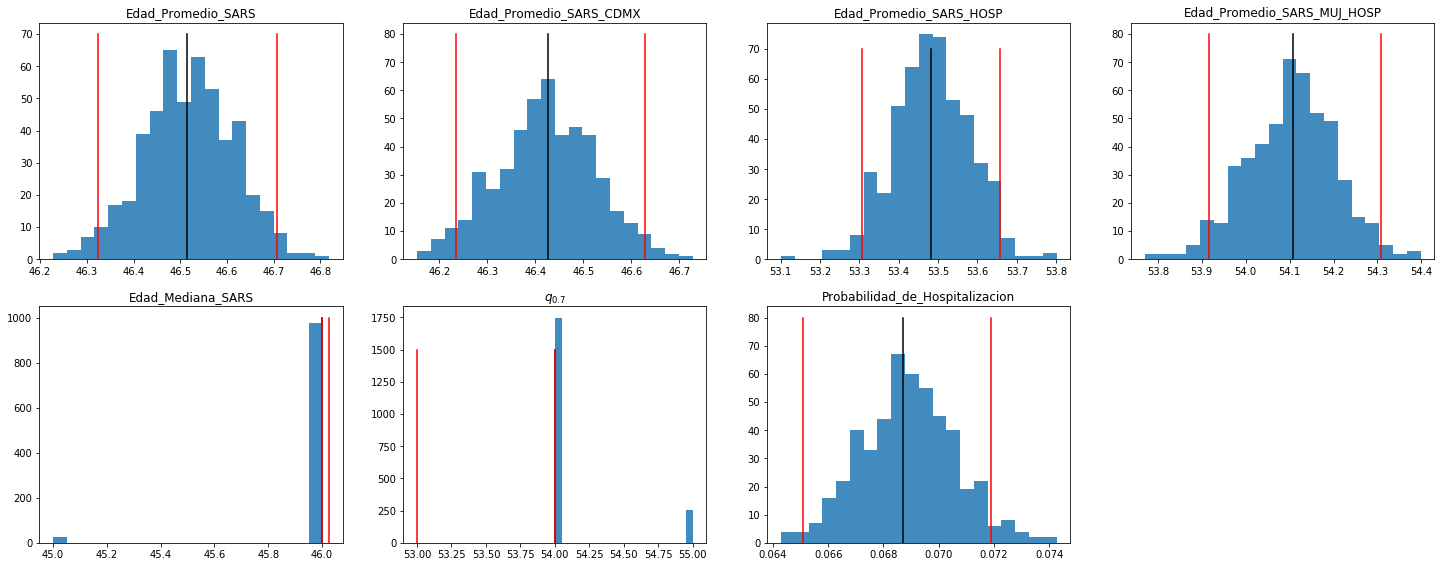

In [88]:
alpha=0.7
plt.figure(figsize=[25,20])
plt.subplot(4,4,1)
plt.hist(T1_List,bins=20,alpha=0.85)
plt.plot([Prom_real_edad,Prom_real_edad],[0,70],color='black')
plt.plot([C1[0],C1[0]],[0,70],color='red')
plt.plot([C1[1],C1[1]],[0,70],color='red')
plt.title('Edad_Promedio_SARS')

plt.subplot(4,4,2)
plt.hist(T2_List,bins=20,alpha=0.85)
plt.plot([PromCDMX_real_edad,PromCDMX_real_edad],[0,80],color='black')
plt.plot([C2[0],C2[0]],[0,80],color='red')
plt.plot([C2[1],C2[1]],[0,80],color='red')
plt.title('Edad_Promedio_SARS_CDMX')

plt.subplot(4,4,3)
plt.hist(T3_List,bins=20,alpha=0.85)
plt.plot([PromHOSP_real_edad,PromHOSP_real_edad],[0,70],color='black')
plt.plot([C3[0],C3[0]],[0,70],color='red')
plt.plot([C3[1],C3[1]],[0,70],color='red')
plt.title('Edad_Promedio_SARS_HOSP')

plt.subplot(4,4,4)
plt.hist(T4_List,bins=20,alpha=0.85)
plt.plot([PromHOSP_real_edad_F,PromHOSP_real_edad_F],[0,80],color='black')
plt.plot([C4[0],C4[0]],[0,80],color='red')
plt.plot([C4[1],C4[1]],[0,80],color='red')
plt.title('Edad_Promedio_SARS_MUJ_HOSP')

plt.subplot(4,4,5)
plt.hist(T5_List,bins=20,alpha=0.85)
plt.plot([Mediana_real_edad,Mediana_real_edad],[0,1000],color='black')
plt.plot([C5[0],C5[0]],[0,1000],color='red')
plt.plot([C5[1],C5[1]],[0,1000],color='red')
plt.title('Edad_Mediana_SARS')

plt.subplot(4,4,6)
plt.hist(T6_List,bins=20,alpha=0.85)
plt.plot([q_real,q_real],[0,1500],color='black')
plt.plot([C6[0],C6[0]],[0,1500],color='red')
plt.plot([C6[1],C6[1]],[0,1500],color='red')
plt.title('$q_{%s}$'%alpha)

plt.subplot(4,4,7)
plt.hist(T7_List,bins=20,alpha=0.85)
plt.plot([probabilidad_hosp_real,probabilidad_hosp_real],[0,80],color='black')
plt.plot([C7[0],C7[0]],[0,80],color='red')
plt.plot([C7[1],C7[1]],[0,80],color='red')
plt.title('Probabilidad_de_Hospitalizacion')


**Appendix jackknife_stats**

In [89]:
##Uso de la funcion  jackknife_stats para comparar los intervalos de confianza ( conf_interval) vs los obtenidos por Bootstraping##

from astropy.stats import jackknife_stats

In [90]:
##Edad promedio de las personas diagnosticados con SARS-CoV-2##
test_statistic = np.mean
data= np.array(X.EDAD)
estimate, bias, stderr, conf_interval, = jackknife_stats(data, test_statistic, 0.95)
print(estimate, bias, stderr, conf_interval)

46.51408120659537 0.0 0.10171141890510292 [46.31473049 46.71343192]


In [91]:
##Edad promedio de las personas diagnosticados con SARS-CoV-2 en la CDMX##
test_statistic = np.mean
data= np.array(X1.EDAD)
estimate, bias, stderr, conf_interval, = jackknife_stats(data, test_statistic, 0.95)
print(estimate, bias, stderr, conf_interval)

46.42605578930964 0.0 0.19488661624832976 [46.04408504 46.80802654]


In [92]:
##Edad promedio de las personas hospitalizadas por ser diagnosticados con SARS-CoV-2##
test_statistic = np.mean
data= np.array(X2.EDAD)
estimate, bias, stderr, conf_interval, = jackknife_stats(data, test_statistic, 0.95)
print(estimate, bias, stderr, conf_interval)

53.48198489758474 -6.586020617760369e-11 0.1564090043094045 [53.17542888 53.78854091]


In [93]:
##Edad promedio de las mujeres hospitalizadas por ser diagnosticadas con SARS-CoV-2##
test_statistic = np.mean
data= np.array(X3.EDAD)
estimate, bias, stderr, conf_interval, = jackknife_stats(data, test_statistic, 0.95)
print(estimate, bias, stderr, conf_interval)

54.10779384035198 0.0 0.27368921522263867 [53.57137284 54.64421485]


In [94]:
##La edad mediana de las personas diagnosticadas con SARS-CoV-2##
test_statistic = lambda x: np.median(x)
data= np.array(X.EDAD)
estimate, bias, stderr, conf_interval, = jackknife_stats(data, test_statistic, 0.95)
print(estimate, bias, stderr, conf_interval)

46.0 0.0 0.0 [46. 46.]
